# Load sign up list exported by Cryptpad poll

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import src.cryptpad_schedule as cs

df = cs.load("data/SG1218-Lab-signup-list.csv")
# Optional
df.index = pd.to_datetime(df.index)

# Ignore Yushi for now
df = df.drop("Yushi", axis=1)

df.head()

Removing TOTAL and cleaning up such that {'no': 0, 'maybe': 1, 'yes': 2}


,Ashwin,Guillaume,Aidan,Ali,Sagar,Arash,Elektra
2018-11-26 10:00:00,1,0,2,1,2,1,1
2018-11-26 13:00:00,1,0,2,2,2,2,2
2018-11-26 15:00:00,1,0,2,2,2,2,2
2018-11-27 08:00:00,2,0,2,0,2,0,1
2018-11-27 13:00:00,1,0,2,2,2,2,2


# Try assigning iteratively and using randomized choices biased by probability

In [75]:
row = df.iloc[0]
maybe = cs.get_tas_by_status(row, "maybe")
yes = cs.get_tas_by_status(row, "yes")
print("MAYBE=\n", maybe, "\n\nYES=\n", yes)

MAYBE=
 Index(['Ashwin', 'Ali', 'Arash', 'Elektra'], dtype='object') 

YES=
 Index(['Aidan ', 'Sagar'], dtype='object')


In [174]:
yes, maybe

(Index(['Aidan ', 'Sagar'], dtype='object'),
 Index(['Ashwin', 'Ali', 'Arash', 'Elektra'], dtype='object'))

In [357]:
init_sched = "TBD"
sched = pd.Series(init_sched, index=df.index)
# sched.iloc[0] = "Sagar"
# counts = sched.value_counts()

## Execute

Text(0.5, 1.0, 'Iterations=3536, skewness=1.2296, kurtosis=-0.8400')

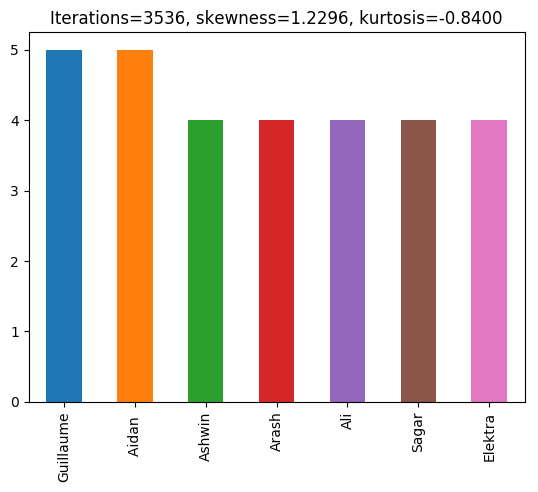

In [388]:
%matplotlib inline
prob_yes = 0.8
maxiter = 5000

for i in range(maxiter):
    sched = cs.schedule(df, sched, prob_yes)  # - 0.35 * i / maxiter)
    counts = sched.value_counts()
    if counts.max() <= 5 and counts.min() >= 4:
        break


fig, ax = plt.subplots()
counts.plot("bar", ax=ax)
skewness = counts.skew()
kurtosis = counts.kurtosis()
ax.set_title(f"Iterations={i+1}, skewness={skewness:.4f}, kurtosis={kurtosis:.4f}")

In [389]:
df_sched = pd.DataFrame(sched.astype("category"), columns=["TA"])
df_sched.head()

,TA
2018-11-26 10:00:00,Elektra
2018-11-26 13:00:00,Sagar
2018-11-26 15:00:00,Arash
2018-11-27 08:00:00,Sagar
2018-11-27 13:00:00,Arash


In [390]:
counts

Guillaume    5
Aidan        5
Ashwin       4
Arash        4
Ali          4
Sagar        4
Elektra      4
dtype: int64

## Save

In [391]:
from datetime import datetime

timestamp = datetime.strftime(datetime.now(), "%Y%m%d-%X")
df_sched.to_csv(f"output/sched_{timestamp}.csv")

fig.savefig(f"output/sched_{timestamp}.png")

# Final

In [394]:
df.join(df_sched)

,Ashwin,Guillaume,Aidan,Ali,Sagar,Arash,Elektra,TA
2018-11-26 10:00:00,1,0,2,1,2,1,1,Elektra
2018-11-26 13:00:00,1,0,2,2,2,2,2,Sagar
2018-11-26 15:00:00,1,0,2,2,2,2,2,Arash
2018-11-27 08:00:00,2,0,2,0,2,0,1,Sagar
2018-11-27 13:00:00,1,0,2,2,2,2,2,Arash
2018-11-27 15:00:00,1,0,1,2,2,2,2,Sagar
2018-11-28 13:00:00,1,0,2,2,2,2,2,Arash
2018-11-28 15:00:00,1,0,0,2,2,2,2,Sagar
2018-11-29 08:00:00,0,0,2,0,0,0,0,Aidan
2018-11-29 13:00:00,0,0,2,2,0,2,0,Arash


## Profile for bottlenecks

In [374]:
%prun -l 20 -s cumulative cs.schedule(df, sched, 0.9)

         216464 function calls (213768 primitive calls) in 0.251 seconds

   Ordered by: cumulative time
   List reduced from 416 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.251    0.251 {built-in method builtins.exec}
        1    0.000    0.000    0.251    0.251 <string>:1(<module>)
        1    0.001    0.001    0.251    0.251 cryptpad_schedule.py:59(schedule)
       30    0.001    0.000    0.110    0.004 cryptpad_schedule.py:38(probability_to_choose)
       60    0.001    0.000    0.093    0.002 cryptpad_schedule.py:17(get_tas_by_status)
       60    0.000    0.000    0.069    0.001 generic.py:7753(where)
       60    0.001    0.000    0.069    0.001 generic.py:7500(_where)
      150    0.002    0.000    0.062    0.000 series.py:764(__getitem__)
       60    0.001    0.000    0.051    0.001 cryptpad_schedule.py:22(normalized_prob_from_count)
      787    0.007    0.000    0.047    0.000 seri

In [375]:
%load_ext snakeviz

In [376]:
%%snakeviz
cs.schedule(df, sched, 0.9)

 
*** Profile stats marshalled to file '/tmp/tmpas8jq_jl'. 
